# Исследование объявлений о продаже квартир

## 1. Общая информация

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
estate_data = pd.read_csv('./data/real_estate_data.csv', sep='\t')

In [3]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## 2. Предообработка данных

Данные по последней цене, общему количеству этажей, количеству балконов, данным по расстоянию до объектов и количество парков и водоемов и количеству дней размещения \
может быть заменено на целочисленный тип. \
Данные по типу апартаментов можно заменить на логический тип.

In [6]:
def convert_to_int(x):
    try:
        return int(x)
    except:
        return -1
    
def convert_to_int_zero(x):
    try:
        return int(x)
    except:
        return 0

### 2.1 Число фотографий квартиры в объявлении `total_images`

In [7]:
estate_data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

В данных количества фотографий нет пропущенных значений, тип данных так же не требует предобработки.

### 2.2 Цена на момент снятия с публикации `last_price`

In [8]:
assert len(estate_data.query('last_price % 1 != 0 | last_price == "NaN"')['last_price']) == 0, "В цене присутствуют копейки"

In [9]:
estate_data.loc[:, 'last_price'] = estate_data['last_price'].apply(convert_to_int)

Данные по ценам не имеют пропусков. Имеют тип данных с плавающей точкой, но все числа в наборе данных не имеют дробной части. Целесообразнее перевести в целочисленный тип.

### 2.3 Площадь квартиры в квадратных метрах (м²) `total_area`

В данных по площади квартир нет пропусков. Тип данных так же не требует обработки, указание дробного типа в площади квартиры распространенная практика.

### 2.4 Дата публикации `first_day_exposition`

In [10]:
estate_data.loc[:, 'first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'])

В датах публикации пропусков нет. Тип переведен из строкового в дату, для дальшейшего выделения дня недели, месяца, года.

### 2.5 Число комнат `rooms`

In [11]:
estate_data.query('rooms == 0')[['total_area', 'rooms', 'is_apartment', 'open_plan', 'studio']].head(5)

,total_area,rooms,is_apartment,open_plan,studio
144,27.00,0,NaN,False,True
349,25.00,0,NaN,True,False
440,27.11,0,NaN,False,True
508,34.40,0,NaN,True,False
608,25.00,0,NaN,False,True


In [12]:
len(estate_data.query('rooms == 0 & open_plan == False & studio == False')[['total_area', 'rooms', 'is_apartment', 'open_plan', 'studio']])

0

In [13]:
len(estate_data.query('rooms == 0 & is_apartment == True')[['total_area', 'rooms', 'is_apartment', 'open_plan', 'studio']])

0

In [14]:
estate_data['rooms'].replace(0, 1, inplace=True)

В данных есть недвижимость с числом нулевым комнат. Это квартиры c открытой планировкой или студии. Так как в России приятно указывать количество комнат и такие квартиры считать однокомнатными, изменил значение комнат с нуля на 1.

### 2.6 Высота потолка `ceiling_height`

In [15]:
ceiling_height_na_count = len(estate_data.loc[estate_data['ceiling_height'].isna()]) / estate_data.shape[0]
print(f'Процент незаполненных данных по высоте потолков {ceiling_height_na_count:0.2%}')

Процент незаполненных данных по высоте потолков 38.80%


In [16]:
ceiling_height_data = estate_data.pivot_table(index='locality_name', values='ceiling_height', aggfunc=['median', 'count'])

In [17]:
ceiling_height_data.columns=['ceiling_height_median', 'ceiling_height_count']
ceiling_height_data.sort_values(by='ceiling_height_count')

,ceiling_height_median,ceiling_height_count
село Шум,NaN,0
деревня Сижно,NaN,0
деревня Снегирёвка,NaN,0
деревня Старое Хинколово,NaN,0
деревня Старополье,NaN,0
...,...,...
Колпино,2.50,203
посёлок Шушары,2.63,217
Пушкин,2.60,234
Всеволожск,2.70,272


In [18]:
estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [19]:
min_ceiling_height = estate_data['ceiling_height'].min()
max_ceiling_height = estate_data['ceiling_height'].max()

In [20]:
estate_data.query('ceiling_height == @min_ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000,55.0,2018-10-31,2,1.0,12.0,32.4,7,NaN,...,10.0,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [21]:
estate_data.query('ceiling_height == @max_ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [22]:
estate_data['ceiling_height'].fillna(-1, inplace=True)

В данных по высоте потолков найдено большое количество пропущенных значений (38.80%). Замена общим средним или медианным значением может исказить данные. Для замены медианным значением по населенным пунктам недостаточно данных в некоторых населенных пунктах. В данных присутствуют явные выбросы 1 метр и 100 метров. Вероятно причина ошибки в ошибке при заполнении формы объявления и отсутствии валидации поля. Для удобства обработки пропущенные значения заменены на -1. 

### 2.7 Количество этажей в доме `floors_total`

In [23]:
floors_total_na = estate_data.loc[estate_data['floors_total'].isnull()].shape[0] / estate_data.shape[0]
print(f'Процент незаполненных данных по количеству этажей в доме {floors_total_na:0.2%}')

Процент незаполненных данных по количеству этажей в доме 0.36%


In [24]:
floors_total_values = estate_data.loc[estate_data['floors_total'].isnull()]['floor'].unique().tolist()
print(sorted(floors_total_values))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24]


In [25]:
last_floors_values = estate_data.query('floors_total == floor')['floors_total'].unique().tolist()
print([int(item) for item in sorted(last_floors_values)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


In [26]:
estate_data.loc[estate_data['floors_total'].isnull(), 'floors_total'] = estate_data.loc[estate_data['floors_total'].isnull(), 'floor']
estate_data.loc[:, 'floors_total'] = estate_data['floors_total'].apply(convert_to_int)

Таких данных меньше 1% и не внесут существенных искажений в данных. Вероятно, пропущено при заполнении формы объявления. Можно сделать предположение, что такие квартиры расположены на последнем этаже дома.

### 2.8 Жилая площадь `living_area`

In [27]:
estate_data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [28]:
min_living_area = estate_data['living_area'].min()
estate_data.query('living_area == @min_living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13915,20,6350000,52.0,2018-02-06,2,3.0,6,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000,23.0,2018-01-01,1,-1.0,24,2.0,22,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0


In [29]:
estate_data['living_area'].fillna(-1, inplace=True)

В данных жилой площади обнаружил выбивающиеся значения жилой площади, вероятно 

### 2.9 Апартаменты `is_apartment`

> Апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания

Для подобных помещений требуется обращение администрацию города и соответствующие документы, следовательно для пропущенных данных такие действия не были проведены. Значит такие помещения не являются апартаментами.

In [30]:
estate_data['is_apartment'].fillna(False, inplace=True)

### 2.10 Свободная планировка и студия `studio, open_plan`

In [31]:
estate_data.rename(columns={'studio': 'is_studio', 'open_plan': 'is_open_plan'}, inplace=True)

Переименовал столбцы, чтобы было более понятно из названия их тип.

### 2.11 Площадь кухни в квадратных метрах (м²) `kitchen_area`

In [32]:
estate_data['kitchen_area'].fillna(-1, inplace=True)

### 2.12 Число балконов `balcony`

In [33]:
estate_data.loc[:, 'balcony'] = estate_data['balcony'].apply(convert_to_int_zero)

### 2.13 Название населённого пункта `locality_name`

In [34]:
estate_data['locality_name'].fillna('unnamed', inplace=True)

В некоторых объявлениях отсутствует населенный пункт, вериятная причина ошибка в выгрузке данных. Пропущенные значения изменил для удобства дальшейней обработки.

### 2.14 Данные по расстоянию до ближайших объектов `airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest`

In [35]:
estate_data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

assert len(estate_data.query('airports_nearest % 1 != 0 & airports_nearest != "NaN"')['airports_nearest']) == 0, "В данных есть см"
assert len(estate_data.query('parks_nearest % 1 != 0 & parks_nearest != "NaN"')['parks_nearest'])  == 0, "В данных есть см"
assert len(estate_data.query('ponds_nearest % 1 != 0 & ponds_nearest != "NaN"')['ponds_nearest'])  == 0, "В данных есть см"
assert len(estate_data.query('city_centers_nearest % 1 != 0 & city_centers_nearest != "NaN"')['city_centers_nearest'])  == 0, "В данных есть см"

estate_data.loc[:, 'airports_nearest'] = estate_data['airports_nearest'].apply(convert_to_int)
estate_data.loc[:, 'parks_nearest'] = estate_data['parks_nearest'].apply(convert_to_int)
estate_data.loc[:, 'ponds_nearest'] = estate_data['ponds_nearest'].apply(convert_to_int)
estate_data.loc[:, 'city_centers_nearest'] = estate_data['city_centers_nearest'].apply(convert_to_int)

In [36]:
st_petersburg_center_median = estate_data.query('city_centers_nearest != -1 & locality_name == "Санкт-Петербург"')['city_centers_nearest'].median()
estate_data.loc[(estate_data['city_centers_nearest'] == -1) & (estate_data['locality_name'] == 'Санкт-Петербург'), 'city_centers_nearest'] = st_petersburg_center_median 

suburbs_center_median = estate_data.query('city_centers_nearest != -1 & locality_name != "Санкт-Петербург"')['city_centers_nearest'].median()

suburbs_center_nearest = (estate_data
 .loc[(estate_data['city_centers_nearest'] != -1) & (estate_data['locality_name'] != 'Санкт-Петербург')]
 .pivot_table(index='locality_name', values='city_centers_nearest', aggfunc='median')
)

In [37]:
def suburbs_center_calc(name):
    if name in suburbs_center_nearest.index:
        return int(suburbs_center_nearest.loc[name])
    else:
        return estate_data['city_centers_nearest'].median()

In [38]:
(estate_data
 .loc[(estate_data['city_centers_nearest'] == -1) & 
      (estate_data['locality_name'] != 'Санкт-Петербург'), 'city_centers_nearest']
) = estate_data.loc[(estate_data['city_centers_nearest'] == -1) & (estate_data['locality_name'] != 'Санкт-Петербург'), 'locality_name'].apply(suburbs_center_calc)

In [39]:
estate_data['city_centers_nearest'] = estate_data['city_centers_nearest'].astype(int)

Данные по расстоянию до ближайших объектов приведены с точностью до метра и не содержат дробной части, можно изменить тип данных на целочисленный. Признак расстояния до центра города переименовал в общем стиле наименования. Пропущенные значения заполнены средним медианным значением расстояния по населенному пункту или общему медианному значению, если значение по населенному пункту нельзя расчитать.

### 2.15 Число объектов в радиусе 3км

In [40]:
assert len(estate_data.query('parks_around3000 % 1 != 0 & parks_around3000 != "NaN"')['parks_around3000']) == 0, "В данных есть дробные значения"
assert len(estate_data.query('ponds_around3000 % 1 != 0 & ponds_around3000 != "NaN"')['ponds_around3000'])  == 0, "В данных есть дробные значения"

estate_data.loc[:, 'parks_around3000'] = estate_data['parks_around3000'].apply(convert_to_int)
estate_data.loc[:, 'ponds_around3000'] = estate_data['ponds_around3000'].apply(convert_to_int)

Данные по количеству объектов можно изменить тип данных на целочисленный.

### 2.16 Дней до снятия публикации

In [41]:
print(len(estate_data.query('days_exposition % 1 != 0 & days_exposition != "NaN"')['days_exposition']))
print(estate_data.loc[8]['days_exposition'])
estate_data.loc[:, 'days_exposition'] = estate_data['days_exposition'].apply(convert_to_int)

apartments_for_sale = len(estate_data.query('days_exposition == -1')) / estate_data.shape[0]
print(f'Процент не закрытых объявлений: {apartments_for_sale:0.2%}')

3997
189.00000000000003
Процент не закрытых объявлений: 13.42%


В данных по дням обнаружены аномалии в виде дней с не нулевой дробной частью, вероятная причина в ошибке подсчета количества дней из даты закрытия объявления. \
Так же присутствуют объявления без даты закрытия. Предполагаю что в выгрузку попали объявления еще не проданных квартир.

## 3. Подсчет и добавление данных в таблицу

### 3.1 Цена квадратного метра

In [42]:
price_per_square_meter = round(estate_data['last_price'] / estate_data['total_area']).astype(int)
estate_data.insert(loc=3, column='price_per_square_meter', value=price_per_square_meter)

### 3.2 День недели, месяц и год публикации объявления

In [43]:
estate_data.insert(loc=5, column='first_weekday_exposition', value=None)
estate_data.insert(loc=6, column='first_month_exposition', value=None)
estate_data.insert(loc=7, column='first_year_exposition', value=None)

estate_data['first_weekday_exposition'] = estate_data['first_day_exposition'].dt.weekday
estate_data['first_month_exposition'] = estate_data['first_day_exposition'].dt.month
estate_data['first_year_exposition'] = estate_data['first_day_exposition'].dt.year

### 3.3 Этаж квартиры

In [44]:
def floor_group(row):
    type_list = ['первый этаж', 'последний этаж', 'предпоследний этаж', 'посередине', 'другое']
    quantile_25 = round(np.quantile(list(range(1, row['floors_total'] + 1)), .25))
    quantile_75 = round(np.quantile(list(range(1, row['floors_total'] + 1)), .75))
    
    if row['floor'] == 1:
        return type_list[0]
    elif row['floor'] == row['floors_total']:
        return type_list[1]
    elif row['floor'] == row['floors_total'] - 1:
        return type_list[2]
    elif quantile_25 < row['floor'] <= quantile_75:
        return type_list[3]
    else: 
        return type_list[4]
    
floor_dict = pd.DataFrame([], columns=['floor_type_id', 'floor_type'])    
floor_dict['floor_type'] = estate_data.apply(floor_group, axis=1)
floor_dict = floor_dict.drop_duplicates().reset_index(drop=True)
floor_dict['floor_type_id'] = floor_dict.index

In [45]:
floor_dict

,floor_type_id,floor_type
0,0,посередине
1,1,первый этаж
2,2,предпоследний этаж
3,3,другое
4,4,последний этаж


In [46]:
def floor_id(row):
    return int(floor_dict[floor_dict['floor_type'] == row]['floor_type_id'])

estate_data.insert(loc=13, column='floor_type', value=None)
estate_data.insert(loc=14, column='floor_type_id', value=None)

estate_data['floor_type'] = estate_data.apply(floor_group, axis=1)
estate_data['floor_type_id'] = estate_data['floor_type'].apply(floor_id)

In [47]:
estate_data[['floors_total', 'floor', 'floor_type', 'floor_type_id']].head(5)

,floors_total,floor,floor_type,floor_type_id
0,16,8,посередине,0
1,11,1,первый этаж,1
2,5,4,предпоследний этаж,2
3,14,9,посередине,0
4,14,13,предпоследний этаж,2


### 3.4 Соотношение площадей

In [48]:
estate_data.insert(loc=12, column='living_area_ratio', value=None)
estate_data.insert(loc=19, column='kitchen_area_ratio', value=None)

In [49]:
def living_area_ratio(row):
    if row['living_area'] == -1:
        return -1 
    
    return round(row['living_area'] / row['total_area'], 2)
        
def kitchen_area_ratio(row):
    if row['kitchen_area'] == -1:
        return -1 
    
    return round(row['kitchen_area'] / row['total_area'], 2)

In [50]:
estate_data['living_area_ratio'] = estate_data.apply(living_area_ratio, axis=1)
estate_data['kitchen_area_ratio'] = estate_data.apply(kitchen_area_ratio, axis=1)

living_area_ratio_median = estate_data.query('living_area_ratio != -1')['living_area_ratio'].median()
kitchen_area_ratio_median = estate_data.query('kitchen_area_ratio != -1')['kitchen_area_ratio'].median()

estate_data.loc[estate_data['living_area_ratio'] == -1, 'living_area_ratio'] = living_area_ratio_median
estate_data.loc[estate_data['kitchen_area_ratio'] == -1, 'kitchen_area_ratio'] = kitchen_area_ratio_median

estate_data.loc[estate_data['living_area'] == -1, 'living_area'] = (
    estate_data
    .loc[estate_data['living_area'] == -1]
    .apply(lambda row: row['total_area'] * row['living_area_ratio'], axis=1)
)

estate_data.loc[estate_data['kitchen_area'] == -1, 'kitchen_area'] = (
    estate_data
    .loc[estate_data['kitchen_area'] == -1]
    .apply(lambda row: row['total_area'] * row['kitchen_area_ratio'], axis=1)
)

## 4 Исследовательский анализ данных

### 4.1 Изучение параметров
#### 4.1.1 Площадь недвижимости

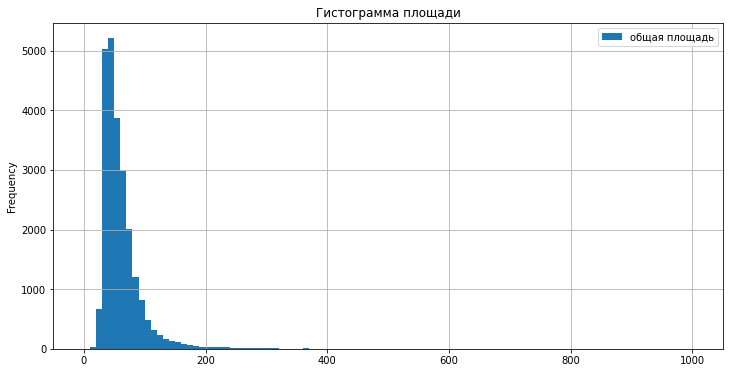

In [51]:
estate_data['total_area'].plot(kind='hist', title='Гистограмма площади', bins=100, range=(0, 1000), figsize=(12, 6), grid=True, legend=True)
plt.legend(['общая площадь'])
plt.show()

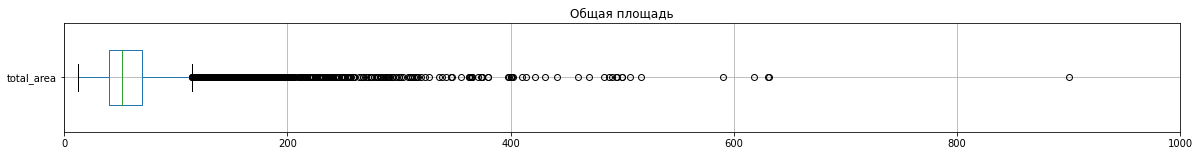

In [52]:
fig_total_area, ax_total_area = plt.subplots(figsize=(20, 2))
ax_total_area.set_title('Общая площадь')
plt.xlim(0, 1000)
estate_data.boxplot(column='total_area', vert=False, widths=0.5)
plt.show()

#### 4.1.2 Цена

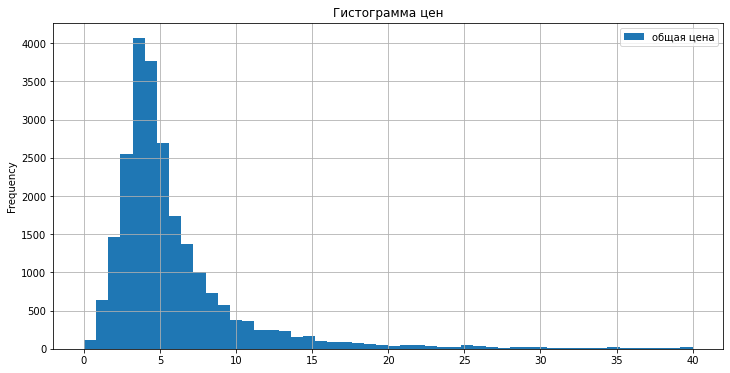

In [53]:
(estate_data['last_price'] / 1_000_000).plot(kind='hist', title='Гистограмма цен', bins=50, range=(0, 40), figsize=(12, 6), grid=True, legend=True)
plt.legend(['общая цена'])
plt.show()

#### 4.1.3 Количество комнат

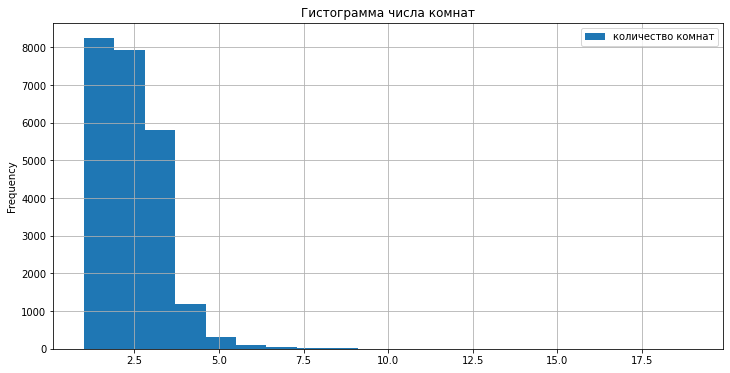

In [54]:
estate_data['rooms'].plot(kind='hist', title='Гистограмма числа комнат', bins=20, figsize=(12, 6), grid=True, legend=True)
plt.legend(['количество комнат'])
plt.show()

#### 4.1.4 Высота потолка

In [55]:
estate_data.query('ceiling_height != -1')['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медианное значение высоты потолка примерно соответствует типовой высоте потолка в жилых зданиях. 

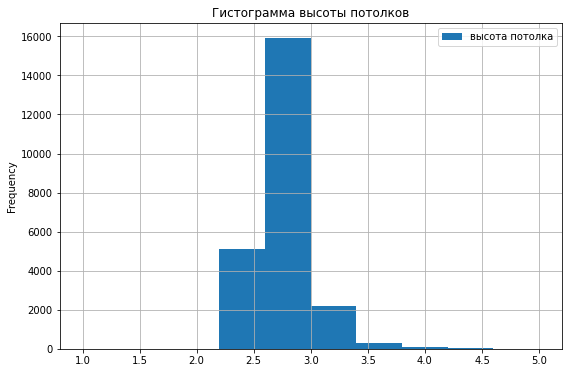

In [56]:
ceiling_height_median = estate_data.query('ceiling_height != -1')['ceiling_height'].median()
estate_data.loc[estate_data['ceiling_height'] == -1, 'ceiling_height'] = ceiling_height_median

estate_data['ceiling_height'].plot(kind='hist', title='Гистограмма высоты потолков', bins=10, range=(1, 5), figsize=(9, 6), grid=True, legend=True)
plt.legend(['высота потолка'])
plt.show()

### 4.2 Время продажи квартиры

In [58]:
days_exposition_data = estate_data.query('days_exposition != -1')
days_exposition_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

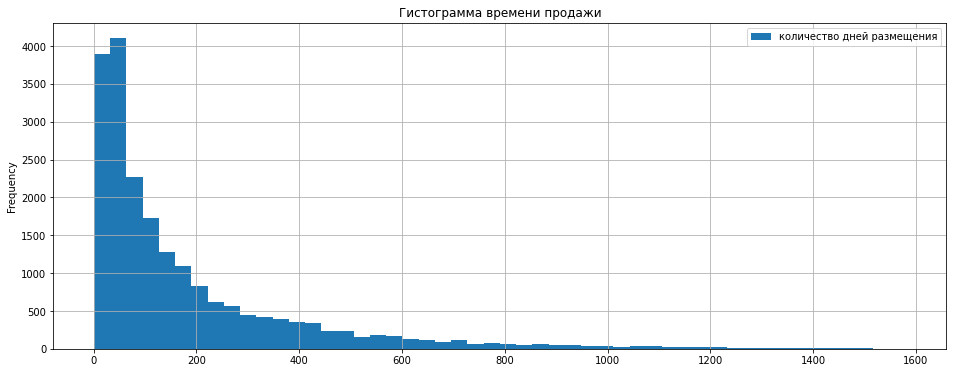

In [59]:
days_exposition_data['days_exposition'].plot(
    kind='hist', 
    title='Гистограмма времени продажи', 
    bins=50, 
    figsize=(16, 6), 
    grid=True, 
    legend=True)
plt.legend(['количество дней размещения'])
plt.show()

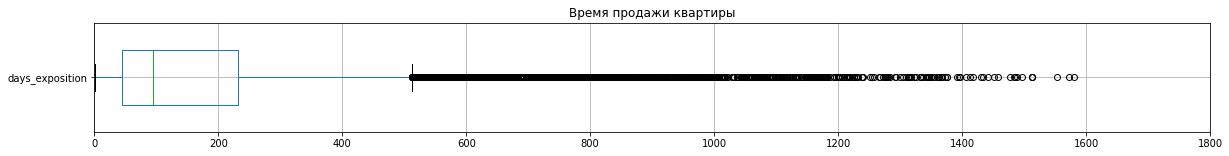

In [60]:
fig_days_exposition, ax_days_exposition = plt.subplots(figsize=(20, 2))
ax_days_exposition.set_title('Время продажи квартиры')
plt.xlim(0, 1800)
days_exposition_data.boxplot(column='days_exposition', vert=False, widths=0.5)
plt.show()

In [61]:
days_exposition_mean = days_exposition_data['days_exposition'].mean()
days_exposition_median = days_exposition_data['days_exposition'].median()

print(f'Среднее время продажи квартиры: {days_exposition_mean:0.2f} дней')
print(f'Медианное время продажи квартиры: {days_exposition_median:0.2f} дней')

Среднее время продажи квартиры: 180.89 дней
Медианное время продажи квартиры: 95.00 дней


Обычно продажа квартиры занимает от **45** дней до **полугода**. **Быстрой** продажей можно считать срок до полутора месяцев, **необычно долгой** более полугода.

### 4.3 Исследование выбросов
#### 4.3.1 Площадь недвижимости

In [62]:
estate_data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [63]:
min_total_area = 25
max_total_area = 250
good_total_area = estate_data.query('@min_total_area < total_area < @max_total_area')
good_total_area['total_area'].describe()

count    23348.000000
mean        59.321335
std         28.700226
min         25.070000
25%         40.200000
50%         52.000000
75%         69.600000
max        249.900000
Name: total_area, dtype: float64

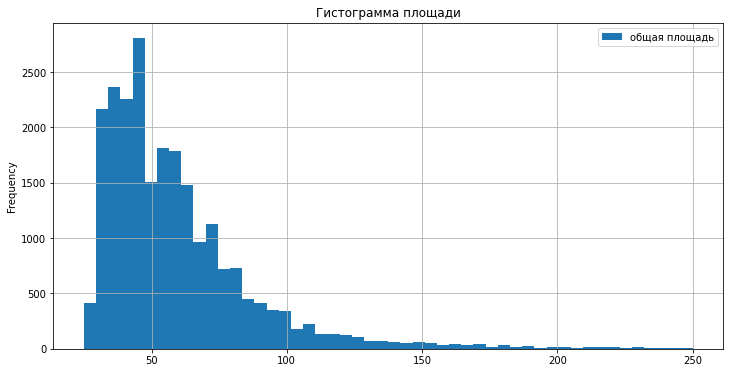

In [64]:
good_total_area['total_area'].plot(kind='hist', title='Гистограмма площади', bins=50, range=(25, 250), figsize=(12, 6), grid=True, legend=True)
plt.legend(['общая площадь'])
plt.show()

Редкими являются объявления с площадью квартиры меньше **25м<sup>2</sup>** и больше **250м<sup>2</sup>**. Средняя площадь без этих объявлений практически не изменилась и хорошо характеризует среднюю площадь квартир в данных.

#### 4.3.2 Цена

In [65]:
(estate_data['last_price'] / 1_000_000).describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

In [66]:
min_last_price = 1_000_000
max_last_price = 35_000_000
last_price_good = estate_data.query('@min_last_price < last_price < @max_last_price')
(last_price_good['last_price'] / 1_000_000).describe()

count    23194.000000
mean         5.860326
std          4.235160
min          1.010000
25%          3.450000
50%          4.650000
75%          6.700000
max         34.979000
Name: last_price, dtype: float64

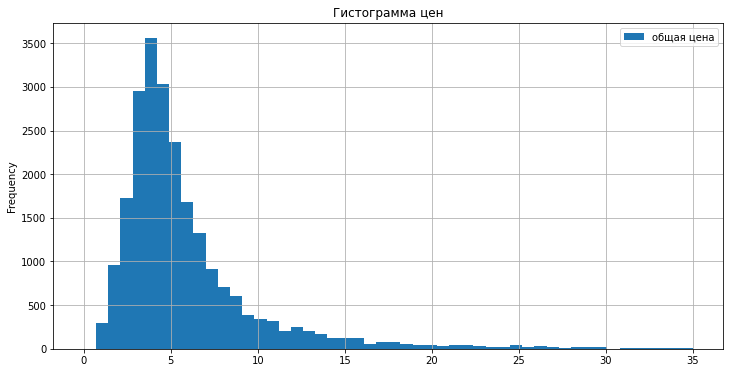

In [67]:
(last_price_good['last_price'] / 1_000_000).plot(kind='hist', title='Гистограмма цен', bins=50, range=(0, 35), figsize=(12, 6), grid=True, legend=True)
plt.legend(['общая цена'])
plt.show()

#### 4.3.3 Число комнат

In [68]:
estate_data['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [69]:
max_rooms = 5
estate_data.query('rooms <= @max_rooms')['rooms'].describe()

count    23504.000000
mean         2.038632
std          0.960367
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

#### 4.3.4 Высота потолков

In [70]:
estate_data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

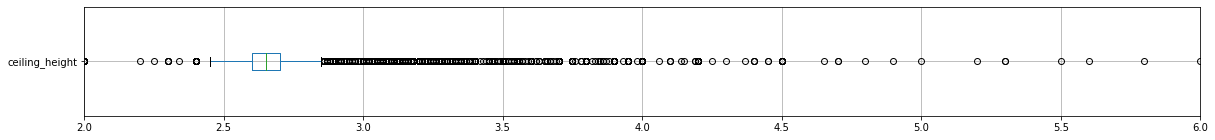

In [71]:
plt.xlim(2, 6)
estate_data['ceiling_height'].plot(kind='box', vert=False, figsize=(20, 2), grid=True)
plt.show()

In [72]:
min_ceiling_height = 2.4
max_ceiling_height = 4
ceiling_height_percent = estate_data.query('@min_ceiling_height <= ceiling_height <= @max_ceiling_height').shape[0] / estate_data.shape[0] 
print(f'{ceiling_height_percent:0.2%}')

99.59%


In [73]:
estate_data.query('@min_ceiling_height <= ceiling_height <= @max_ceiling_height')['ceiling_height'].describe()

count    23603.000000
mean         2.693807
std          0.204079
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Редкими значениями для данных по высоте потолка являются квартиры меньше **2.4м** и больше **4м**

### 4.4 Факторы влияющие на стоимость квартиры

In [74]:
good_stat = estate_data.query('@min_total_area < total_area < @max_total_area &' \
                                 '@min_last_price < last_price < @max_last_price &' \
                                 'rooms <= @max_rooms &' \
                                 '@min_ceiling_height <= ceiling_height <= @max_ceiling_height')

                      last_price  city_centers_nearest     rooms  total_area
last_price              1.000000             -0.371466  0.633349    0.846205
city_centers_nearest   -0.371466              1.000000 -0.263851   -0.287525
rooms                   0.633349             -0.263851  1.000000    0.830152
total_area              0.846205             -0.287525  0.830152    1.000000


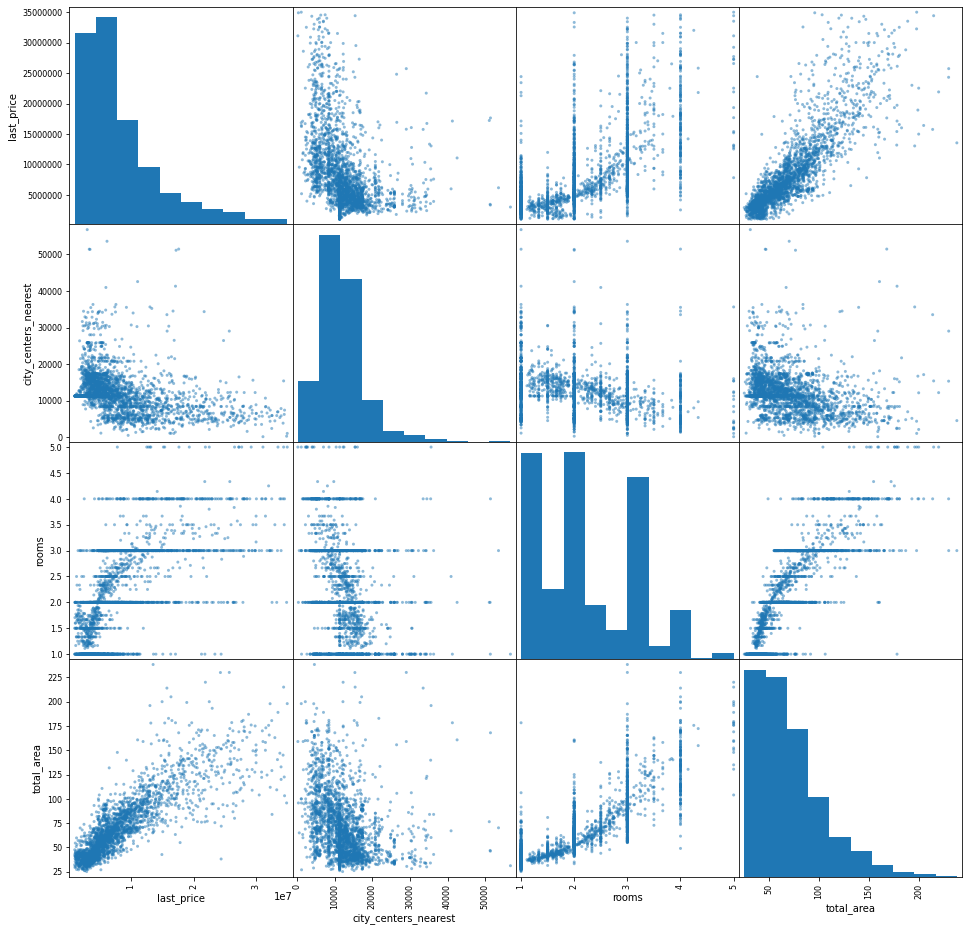

In [75]:
factors_stat_multi = good_stat.pivot_table(index='last_price', values=['total_area', 'rooms', 'city_centers_nearest'], aggfunc='mean')
factors_stat_multi.reset_index(inplace=True)
print(factors_stat_multi.corr())
pd.plotting.scatter_matrix(factors_stat_multi, figsize=(16, 16))
plt.show()

Наибольшим фактором влияющим на стоимость квартиры является общая площадь, количество комнат и удаленность от города оказывают меньше влияние на цену.

In [76]:
price_floor = good_stat.pivot_table(index='floor_type', values='last_price', aggfunc='median')
price_floor.reset_index(inplace=True)

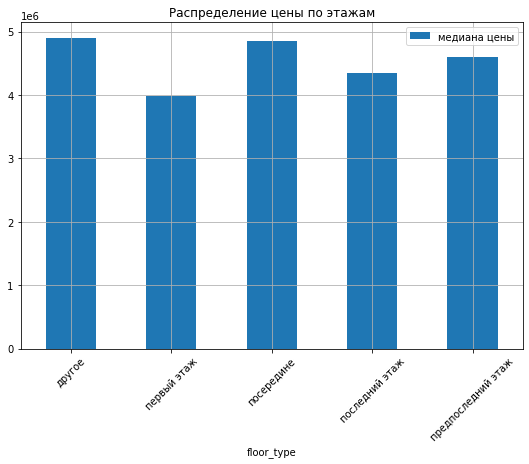

In [77]:
price_floor.plot(x='floor_type', y='last_price', kind='bar', grid=True, figsize=(9,6))
plt.xticks(rotation=45)
plt.title('Распределение цены по этажам')
plt.legend(['медиана цены'])
plt.show()

Наиболее дешевые квартиры расплолагаются на первом этаже, на последних этажах расположены более дорогие квартиры. Наиболее дорогие квартиры располагаются посередине и в других частях домов.

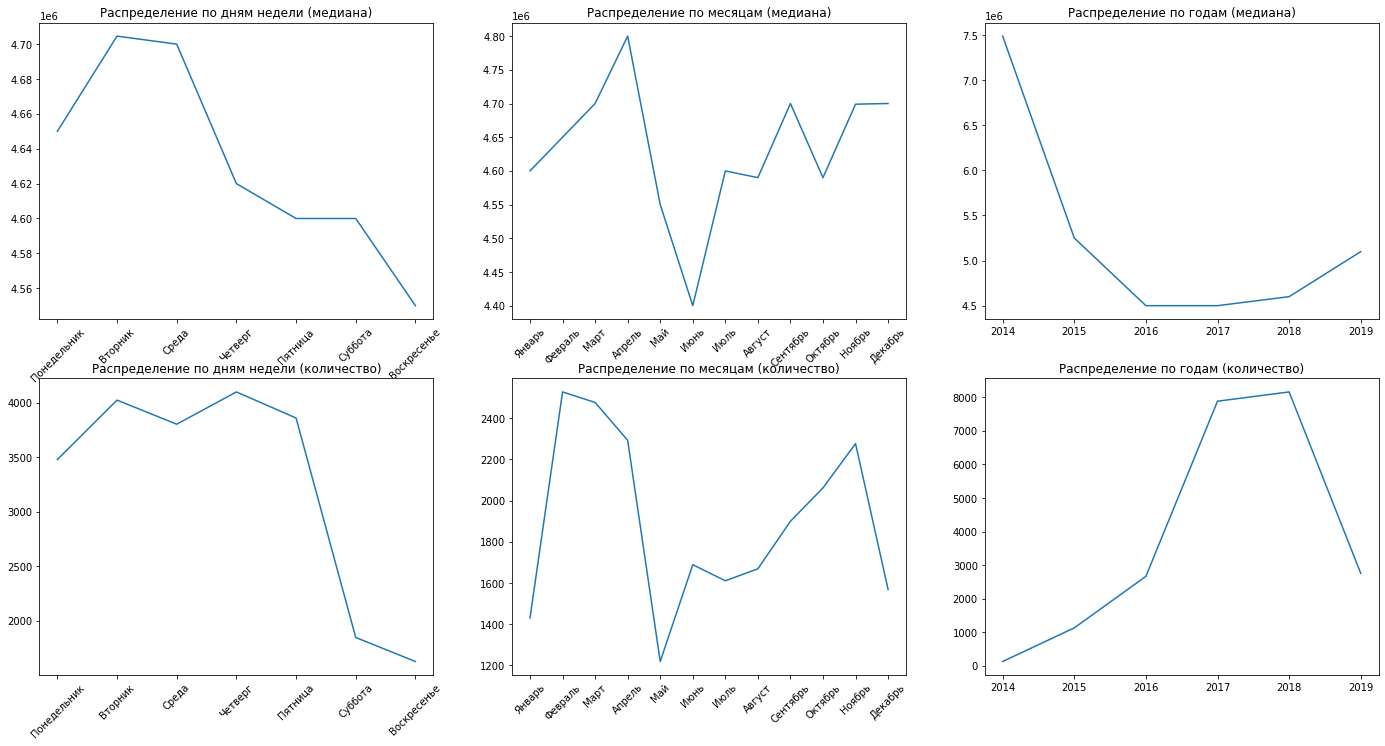

In [78]:
price_weekday = good_stat.pivot_table(index='first_weekday_exposition', values='last_price', aggfunc=['median', 'count'])
price_weekday.columns=('median', 'count')

price_month = good_stat.pivot_table(index='first_month_exposition', values='last_price', aggfunc=['median', 'count'])
price_month.columns=('median', 'count')

price_year = good_stat.pivot_table(index='first_year_exposition', values='last_price', aggfunc=['median', 'count'])
price_year.columns=('median', 'count')

fig_price1, ((ax_weekday_median, ax_month_median, ax_year_median), (ax_weekday_count, ax_month_count, ax_year_count)) = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))
ax_weekday_median.plot(price_weekday.index, price_weekday['median'])
ax_weekday_median.set_xticks(ticks=price_weekday.index)
ax_weekday_median.set_xticklabels(labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'], rotation=45)
ax_weekday_median.title.set_text('Распределение по дням недели (медиана)')

ax_weekday_count.plot(price_weekday.index, price_weekday['count'])
ax_weekday_count.set_xticks(ticks=price_weekday.index)
ax_weekday_count.set_xticklabels(labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'], rotation=45)
ax_weekday_count.title.set_text('Распределение по дням недели (количество)')

ax_month_median.plot(price_month.index, price_month['median'])
ax_month_median.set_xticks(ticks=price_month.index)
ax_month_median.set_xticklabels(labels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], rotation=45)
ax_month_median.title.set_text('Распределение по месяцам (медиана)')

ax_month_count.plot(price_month.index, price_month['count'])
ax_month_count.set_xticks(ticks=price_month.index)
ax_month_count.set_xticklabels(labels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], rotation=45)
ax_month_count.title.set_text('Распределение по месяцам (количество)')

ax_year_median.plot(price_year.index, price_year['median'])
ax_year_median.title.set_text('Распределение по годам (медиана)')

ax_year_count.plot(price_year.index, price_year['count'])
ax_year_count.title.set_text('Распределение по годам (количество)')
plt.show()


Больше всего объявлений было размещено в будние дни. Наиболее дорогие объявления так же размещены в будние дни, в первую половину недели. Можно предположить что такие объявления размещаются агенствами недвижимости, наиболее ценные клиенты обрабатываются в первую очередь. \
Распределение по месяцам показывает наличие двух сезонов для продажи квартир. После новогодних праздников по майские и осенью, после летних отпусков. \
Распределение по годам показывает снижение медианной цены квартиры к 2016 году, при увеличении количества объявлений. Вероятная причина такого в повышении курса доллара и кризисе.

### 4.5 Населенные пункты с наибольшим числом объявлений

In [79]:
per_square_top = good_stat.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['mean', 'count'])
per_square_top.columns = ('mean', 'count')

top_ten_cities = per_square_top.sort_values(by='count', ascending=False).head(10)
print(f'10 населённых пунктов с наибольшим числом объявлений:\n {top_ten_cities}')

10 населённых пунктов с наибольшим числом объявлений:
                             mean  count
locality_name                          
Санкт-Петербург    110823.873746  15152
посёлок Мурино      84915.946502    486
посёлок Шушары      78152.215278    432
Всеволожск          68710.544757    391
Пушкин             103108.222527    364
Колпино             75239.583333    336
посёлок Парголово   90430.695385    325
Гатчина             68947.350820    305
деревня Кудрово     91966.435714    280
Выборг              58360.328889    225


In [80]:
top_ten_cities_name = list(per_square_top.sort_values(by='count', ascending=False).head(10).index)

top_cities_data = good_stat.query('locality_name in @top_ten_cities_name')
max_city_price = top_cities_data.loc[top_cities_data['last_price'] == top_cities_data['last_price'].max()][['locality_name', 'last_price']]
min_city_price = top_cities_data.loc[top_cities_data['last_price'] == top_cities_data['last_price'].min()][['locality_name', 'last_price']]

max_city_price_name = max_city_price['locality_name'].values.tolist()
max_city_price_value = max_city_price['last_price'].values.tolist()
min_city_price_name = min_city_price['locality_name'].values.tolist()
min_city_price_value = min_city_price['last_price'].values.tolist()

print(f'Населенный пункт с самой высокой стоимостью жилья {" и ".join(max_city_price_name)}, стоимость квартиры {" и ".join(str(item) for item in max_city_price_value)}')
print(f'Населенный пункт с самой низкой стоимостью жилья {" и ".join(min_city_price_name)}, стоимость квартиры {" и ".join(str(item) for item in min_city_price_value)}')

Населенный пункт с самой высокой стоимостью жилья Санкт-Петербург, стоимость квартиры 34979000
Населенный пункт с самой низкой стоимостью жилья Выборг и Гатчина, стоимость квартиры 1050000 и 1050000


### 4.6 Расстояние до центра

In [81]:
def calc_price_per_km(row):
    if row['city_centers_nearest_km'] == 0:
        return row['last_price']
    else:
        return round(row['last_price'] / row['city_centers_nearest_km'], 0)
        
estate_data.insert(loc=25, column='city_centers_nearest_km', value=None)
estate_data['city_centers_nearest_km'] = round(estate_data['city_centers_nearest'] / 1000).astype(int)

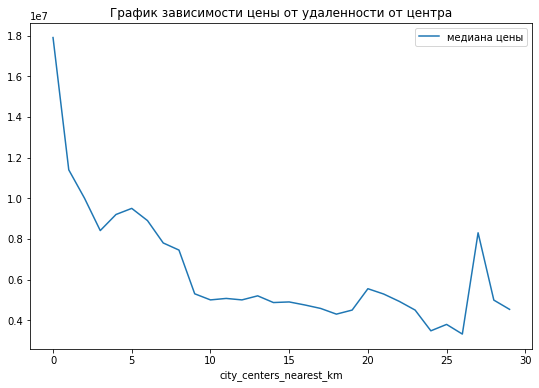

In [82]:
st_peterburg_nearest_km = estate_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median')
st_peterburg_nearest_km.reset_index(inplace=True)
st_peterburg_nearest_km.plot(x='city_centers_nearest_km', y='last_price', figsize=(9, 6))
plt.title('График зависимости цены от удаленности от центра')
plt.legend(['медиана цены'])
plt.show()

### 4.7 Квартиры в центре

In [83]:
print(estate_data.query('city_centers_nearest_km <= 5')['locality_name'].unique())

['Санкт-Петербург' 'unnamed']


In [84]:
estate_data.loc[(estate_data['locality_name'] == 'unnamed') & (estate_data['city_centers_nearest_km'] <= 5), 'locality_name'] = "Санкт-Петербург"

good_stat_center = estate_data.query('@min_total_area < total_area < @max_total_area &' \
                                 '@min_last_price < last_price < @max_last_price &' \
                                 'rooms <= @max_rooms &' \
                                 '@min_ceiling_height <= ceiling_height <= @max_ceiling_height')


center_segment = good_stat_center.query('locality_name == "Санкт-Петербург" & city_centers_nearest_km <= 5')

                      last_price  city_centers_nearest     rooms  total_area
last_price              1.000000             -0.061118  0.507990    0.759434
city_centers_nearest   -0.061118              1.000000 -0.188852   -0.089677
rooms                   0.507990             -0.188852  1.000000    0.774580
total_area              0.759434             -0.089677  0.774580    1.000000


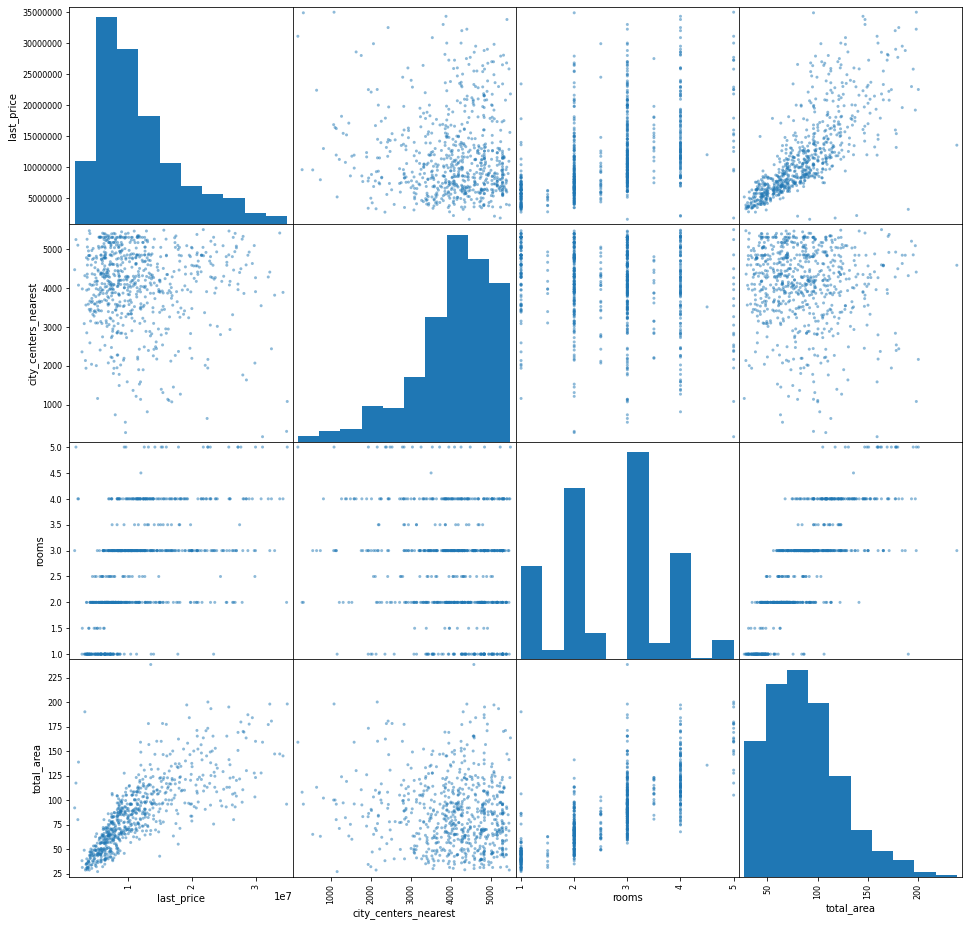

In [85]:
center_segment_stat = center_segment.pivot_table(index='last_price', values=['total_area', 'rooms', 'city_centers_nearest'], aggfunc='median')
center_segment_stat.reset_index(inplace=True)
print(center_segment_stat.corr())
pd.plotting.scatter_matrix(center_segment_stat, figsize=(16, 16))
plt.show()

Удаленность для квартир расположенных в центре города оказывают меньше влияния на цену. Количество комнат и общая площадь имеют сходную корреляцию с общими выводами.

            last_price
last_price         1.0


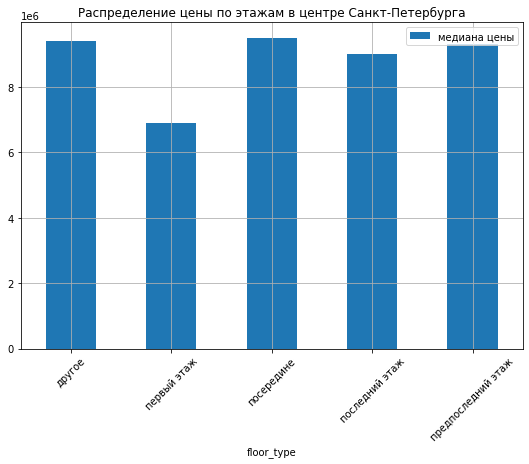

In [86]:
center_price_floor = center_segment.pivot_table(index='floor_type', values='last_price', aggfunc='median')
print(center_price_floor.corr())
center_price_floor.reset_index(inplace=True)

center_price_floor.plot(x='floor_type', y='last_price', kind='bar', grid=True, figsize=(9,6))
plt.xticks(rotation=45)
plt.title('Распределение цены по этажам в центре Санкт-Петербурга')
plt.legend(['медиана цены'])
plt.show()

Отношение стоимости жилья к этажу в центре города схожа с общей картиной.

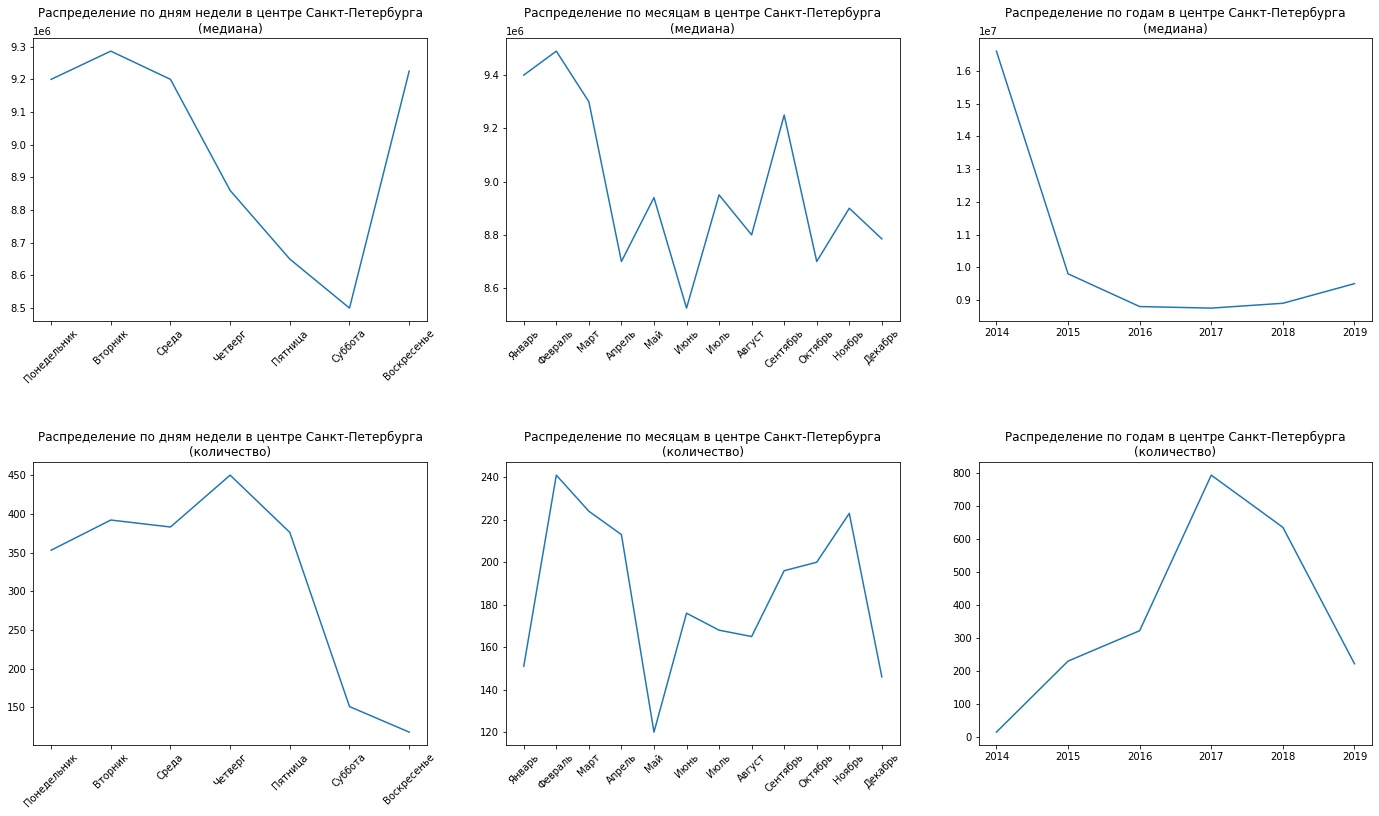

In [87]:
center_price_weekday = center_segment.pivot_table(index='first_weekday_exposition', values='last_price', aggfunc=['median', 'count'])
center_price_weekday.columns=('median', 'count')

center_price_month = center_segment.pivot_table(index='first_month_exposition', values='last_price', aggfunc=['median', 'count'])
center_price_month.columns=('median', 'count')

center_price_year = center_segment.pivot_table(index='first_year_exposition', values='last_price', aggfunc=['median', 'count'])
center_price_year.columns=('median', 'count')

fig_price1, ((ax_center_weekday_median, ax_center_month_median, ax_center_year_median), 
             (ax_center_weekday_count, ax_center_month_count, ax_center_year_count)) = plt.subplots(nrows=2, ncols=3, figsize=(24, 13))

ax_center_weekday_median.plot(center_price_weekday.index, center_price_weekday['median'])
ax_center_weekday_median.set_xticks(ticks=center_price_weekday.index)
ax_center_weekday_median.set_xticklabels(labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'], rotation=45)
ax_center_weekday_median.title.set_text('Распределение по дням недели в центре Санкт-Петербурга\n(медиана)')

ax_center_weekday_count.plot(center_price_weekday.index, center_price_weekday['count'])
ax_center_weekday_count.set_xticks(ticks=center_price_weekday.index)
ax_center_weekday_count.set_xticklabels(labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'], rotation=45)
ax_center_weekday_count.title.set_text('Распределение по дням недели в центре Санкт-Петербурга\n(количество)')

ax_center_month_median.plot(center_price_month.index, center_price_month['median'])
ax_center_month_median.set_xticks(ticks=center_price_month.index)
ax_center_month_median.set_xticklabels(labels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], rotation=45)
ax_center_month_median.title.set_text('Распределение по месяцам в центре Санкт-Петербурга\n(медиана)')

ax_center_month_count.plot(center_price_month.index, center_price_month['count'])
ax_center_month_count.set_xticks(ticks=center_price_month.index)
ax_center_month_count.set_xticklabels(labels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], rotation=45)
ax_center_month_count.title.set_text('Распределение по месяцам в центре Санкт-Петербурга\n(количество)')

ax_center_year_median.plot(center_price_year.index, center_price_year['median'])
ax_center_year_median.title.set_text('Распределение по годам в центре Санкт-Петербурга\n(медиана)')

ax_center_year_count.plot(center_price_year.index, center_price_year['count'])
ax_center_year_count.title.set_text('Распределение по годам в центре Санкт-Петербурга\n(количество)')
plt.subplots_adjust(hspace=0.5)
plt.show()

Распределение по дням недели, месяцу и году в центре города так же схоже с общей картиной.

## 5 Общий вывод

Наибольше влияние на стоимость жилья оказывает общая площадь жилья и количество комнат. В центре города, при увеличении стоимости жилья факторы влияющие на стоимость жилья не изменяются. Так же на размещение объявлений влияет день недели, сезонность и экономические кризисы.